<a href="https://colab.research.google.com/github/tingtingting118/RSclass/blob/master/Employee_churn_rate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [5]:
from google.colab import files
uploaded = files.upload()


Saving test.csv to test.csv


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score

In [0]:
#data exploration 
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")



In [53]:
#Data Cleaning - Combine train and test data for convinence.
full_data = train.append(test,ignore_index = True)
#drop columns that would not help for prediction 
#user_id,EmployeeNumber, EmployeeCount,Over18,StandardHours
full_data.drop(['EmployeeCount','EmployeeNumber','Over18','StandardHours','HourlyRate','DailyRate','MonthlyRate'],axis = 1,inplace = True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:7138: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


In [54]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 29 columns):
Age                         1470 non-null int64
Attrition                   1176 non-null object
BusinessTravel              1470 non-null object
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome               1470 non-null int64
NumCompaniesWorked          1470 non-null int64
OverTime                    1470 non-null object
PercentSalaryHike           1470 non-null int64
PerformanceRating    

In [55]:
full_data['Attrition'].value_counts()

No     988
Yes    188
Name: Attrition, dtype: int64

In [34]:
#Explore the data by rate in terms of Whether the employee left the job or not
for col in full_data.columns:
  if full_data[col].dtype =='int64':
    print(col + ": ")
    print((full_data[full_data['Attrition'] =='Yes'][col].value_counts() / full_data[col].value_counts()).sort_index(ascending = True))
    print("----------------")



Age: 
18    0.500000
19    0.555556
20    0.545455
21    0.461538
22    0.125000
23    0.214286
24    0.192308
25    0.153846
26    0.282051
27    0.062500
28    0.208333
29    0.235294
30    0.150000
31    0.202899
32    0.131148
33    0.189655
34    0.090909
35    0.102564
36    0.057971
37    0.100000
38    0.017241
39    0.095238
40    0.070175
41    0.075000
42    0.021739
43    0.062500
44    0.151515
45    0.024390
46    0.090909
47    0.125000
48    0.105263
49    0.083333
50    0.100000
51    0.105263
52    0.111111
53    0.052632
54         NaN
55    0.090909
56    0.142857
57         NaN
58    0.285714
59         NaN
60         NaN
Name: Age, dtype: float64
----------------
DistanceFromHome: 
1     0.100962
2     0.104265
3     0.142857
4     0.125000
5     0.123077
6     0.101695
7     0.107143
8     0.087500
9     0.141176
10    0.104651
11    0.137931
12    0.150000
13    0.210526
14    0.142857
15    0.192308
16    0.218750
17    0.250000
18    0.115385
19    0.136364
20

In [35]:
#quickly explore the data 
for col in full_data.columns:
  if full_data[col].dtype =='object':
    print(col + ": ")
    print((full_data[full_data['Attrition'] =='Yes'][col].value_counts() / full_data[col].value_counts()).sort_index(ascending = True))
    print("----------------")

Attrition: 
No     NaN
Yes    1.0
Name: Attrition, dtype: float64
----------------
BusinessTravel: 
Non-Travel           0.060000
Travel_Frequently    0.202166
Travel_Rarely        0.117929
Name: BusinessTravel, dtype: float64
----------------
Department: 
Human Resources           0.174603
Research & Development    0.109261
Sales                     0.161435
Name: Department, dtype: float64
----------------
EducationField: 
Human Resources     0.259259
Life Sciences       0.112211
Marketing           0.182390
Medical             0.101293
Other               0.121951
Technical Degree    0.204545
Name: EducationField, dtype: float64
----------------
Gender: 
Female    0.112245
Male      0.138322
Name: Gender, dtype: float64
----------------
JobRole: 
Healthcare Representative    0.061069
Human Resources              0.211538
Laboratory Technician        0.196911
Manager                      0.039216
Manufacturing Director       0.041379
Research Director            0.012500
Research Sci

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4affbf7550>,
      dtype=object)

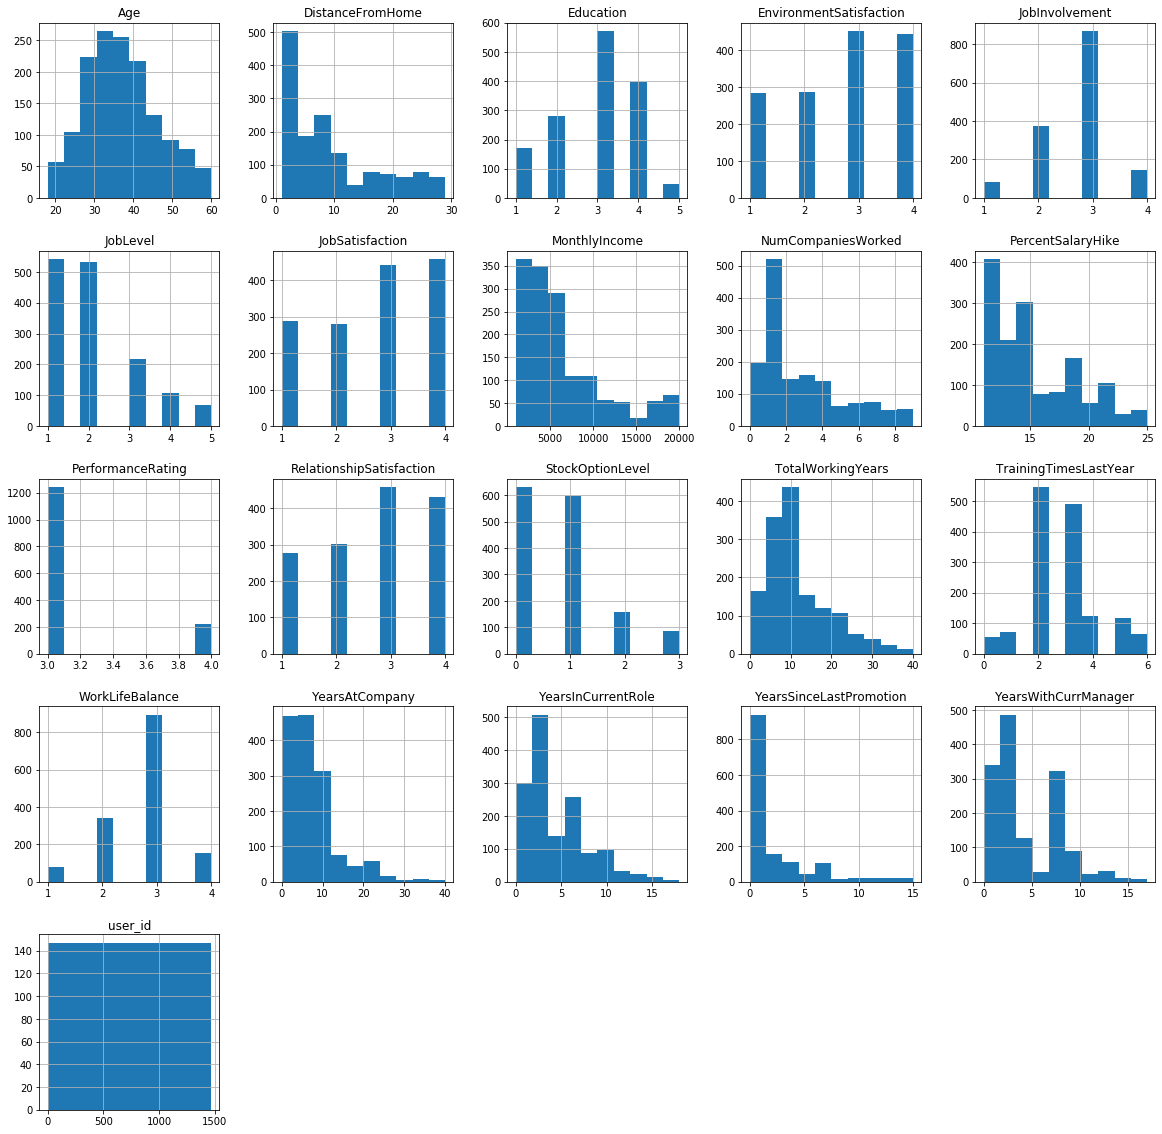

In [36]:
###EducationField, Travel have a bigger impact on the churn rate, also, people who are singles are more likely to leave
#ppl have to work overtime is likely to leave
full_data.hist(figsize = (20,20))

In [56]:
full_data.loc[full_data['Attrition'] == 'Yes','Attrition'] = 1.0
full_data.loc[full_data['Attrition'] == 'No','Attrition'] = 0.0
full_data['Attrition'].describe()

count     1176.0
unique       2.0
top          0.0
freq       988.0
Name: Attrition, dtype: float64

In [0]:
import seaborn as sns

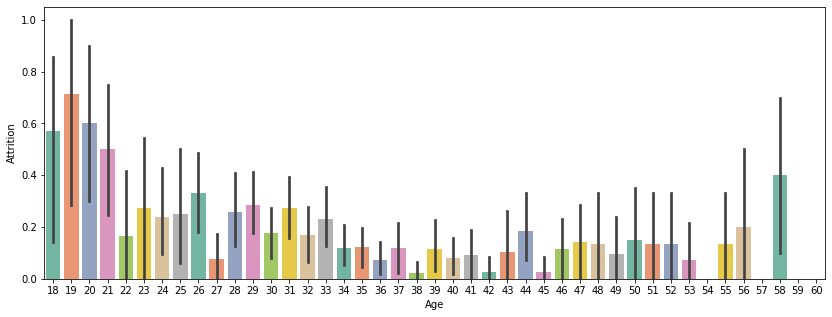

In [38]:
plt.figure(figsize = (14,5))
sns.barplot(x = 'Age',y='Attrition',data = full_data,palette = 'Set2')

In [0]:
def resetAge(name):
    if (name < 24) & (name > 18) & (name == 58):
        return 1
    elif (name == 54) & (name == 57) & (name == 59) & (name == 60):
        return 0
    else:
        return 2

In [0]:
full_data['Age'] = full_data['Age'].apply(resetAge)  


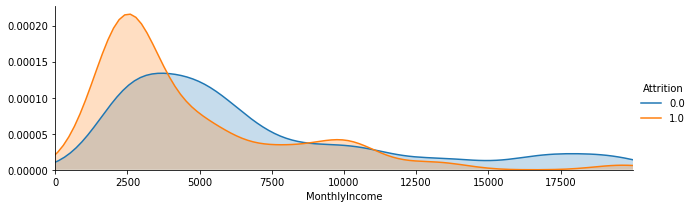

In [41]:
#https://zhuanlan.zhihu.com/p/27816821
#monthly Income
facet = sns.FacetGrid(full_data,hue = 'Attrition' ,aspect=3)  #a way to visualized multi-dimensional data ( 3 dimensions here--> row, col, hue)
facet.map(sns.kdeplot,'MonthlyIncome',shade = True)

#map is a function to pass ur chart -->sns.kdeplot here 
facet.set(xlim=(0,full_data['MonthlyIncome'].max()))
facet.add_legend()
#we learned that people have monthly income within 7.5k is more likely to leave 

In [0]:
#regroup Income
full_data['Salary'] = 2
full_data.loc[full_data['MonthlyIncome'] <=5000,'Salary'] = 0
full_data.loc[(full_data['MonthlyIncome']>5000) & (full_data['MonthlyIncome']<=7000),'Salary'] = 1


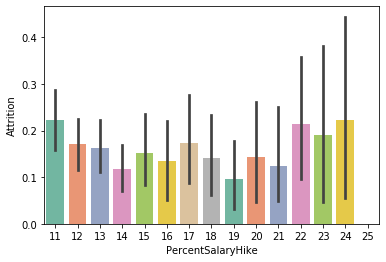

In [43]:
#PercentSalaryHike
sns.barplot(x = 'PercentSalaryHike',y = 'Attrition',data = full_data,palette = 'Set2')

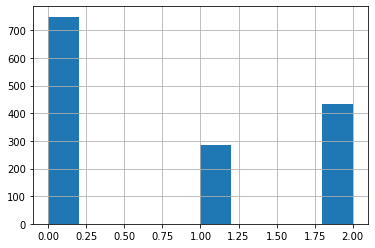

In [60]:
full_data['Salary'].hist()

In [61]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 30 columns):
Age                         1470 non-null int64
Attrition                   1176 non-null object
BusinessTravel              1470 non-null object
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome               1470 non-null int64
NumCompaniesWorked          1470 non-null int64
OverTime                    1470 non-null object
PercentSalaryHike           1470 non-null int64
PerformanceRating    

In [0]:
#build up datdaset for modeling
full_data2 = full_data.copy()
#onehot and get_dummies
categorial_data = pd.DataFrame()
for i in full_data2.columns:
    if full_data2[i].dtype == 'O':
        cata = pd.DataFrame()
        cata = pd.get_dummies(full_data2[i],prefix=i)
        cata_result = pd.concat([categorial_data,cata],axis=1)

In [0]:
#won't use attrition for test data set, so randomly assign a number for NaN
full_data2.loc[full_data2['Attrition'].isnull(),'Attrition'] =0

In [0]:
full_data2['Attrition'] = full_data2['Attrition'].astype(int)

In [0]:
#remove object data type and use onehot 
for i in full_data2.columns:
  if full_data2[i].dtype == 'O':
    full_data2 = full_data2.drop(i,axis = 1)


In [0]:
#append the onehot tgt with continuous data
full_data2 = pd.concat([full_data2,cata_result],axis = 1)

In [88]:
full_data2.drop('MonthlyIncome',axis = 1, inplace = True)
full_data2.columns

Index(['Age', 'Attrition', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'user_id', 'Salary', 'OverTime_No',
       'OverTime_Yes'],
      dtype='object')

In [89]:
full_data2.shape

(1470, 24)

In [90]:
full_data2.head()

,Age,Attrition,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,user_id,Salary,OverTime_No,OverTime_Yes
0,2,0,21,3,4,3,4,4,4,13,3,3,1,29,2,2,1,0,0,0,1374,2,0,1
1,2,0,28,3,4,3,1,4,4,20,4,4,1,8,3,3,5,4,0,3,1092,0,1,0
2,2,0,26,3,3,3,2,1,1,14,3,2,1,8,3,2,7,7,7,5,768,2,1,0
3,2,0,8,4,1,2,3,1,1,15,3,2,0,10,1,3,10,7,0,9,569,2,1,0
4,2,1,24,1,3,1,1,4,1,14,3,4,0,1,4,3,1,0,1,0,911,0,0,1


In [0]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm


In [0]:
import xgboost as xgb

In [0]:
#resplit the dataset
training_data =full_data2[full_data2['user_id'].isin(train['user_id'])]

In [0]:
test_data = full_data2[full_data2['user_id'].isin(test['user_id'])]

In [0]:
X = training_data.drop(columns = ['user_id','Attrition'],axis = 1)
Y = training_data['Attrition']

In [0]:
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.3, random_state=33)


In [0]:
#Logistic Regression 
#normalization
ss = preprocessing.StandardScaler()
train_ss_x = ss.fit_transform(train_x)
test_ss_x = ss.transform(test_x)

In [110]:
lr = LogisticRegression()
lr.fit(train_ss_x, train_y)
predict_y=lr.predict(test_ss_x)
print('LR准确率: %0.4lf' % accuracy_score(predict_y, test_y))

LR准确率: 0.8782


In [132]:
print('LR AUC Score: %0.4lf' % roc_auc_score(predict_y, test_y))

LR AUC Score: 0.7767


In [0]:
#other models 
models = {}
models['DecisionTree'] = DecisionTreeClassifier()  
models['SVM'] = svm.SVC()
models['RandomForest'] = RandomForestClassifier()



In [130]:
for model in models:
  models[model].fit(train_x,train_y)
  test_predict = models[model].predict(test_x)
  print('{}'.format(model) + '准确率:' + ' %0.4lf' % accuracy_score(test_predict, test_y))
  score = cross_val_score(models[model],X,Y,cv=5,scoring='accuracy')
  #score_auc = cross_val_score(models[model],X,Y,cv=5,scoring='roc_auc')
  
  print("%s:%.3f(%.3f)"%(model,score.mean(),score.std()))

DecisionTree准确率: 0.7677
DecisionTree:0.786(0.007)
SVM准确率: 0.8527
SVM:0.840(0.002)
RandomForest准确率: 0.8612
RandomForest:0.855(0.008)


In [131]:
for model in models:
  models[model].fit(train_x,train_y)
  test_predict = models[model].predict(test_x)
  print('{}'.format(model) + '_AUC:' + ' %0.4lf' % accuracy_score(test_predict, test_y))
  
  score_auc = cross_val_score(models[model],X,Y,cv=5,scoring='roc_auc')
  
  print("%s:%.3f(%.3f)"%(model,score_auc.mean(),score_auc.std()))

DecisionTree_AUC: 0.7677
DecisionTree:0.593(0.027)
SVM_AUC: 0.8527
SVM:0.790(0.024)
RandomForest_AUC: 0.8527
RandomForest:0.792(0.027)


In [113]:
test_data = test_data.set_index('user_id')
print(test_data.shape)

(294, 23)


In [0]:
#remove the label that was assigned before for data cleaning
test_data = test_data.drop('Attrition',axis = 1)

In [115]:
test_data.shape

(294, 22)

In [116]:
X.shape

(1176, 22)

In [0]:
result_lr = lr.predict(test_data)

In [0]:
result_lr_prob = lr.predict_proba(test_data)[:,1]  # get probability of positive result

In [119]:
test_data.head()


,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Salary,OverTime_No,OverTime_Yes
user_id,,,,,,,,,,,,,,,,,,,,,,
442,2,10,4,2,3,3,4,1,14,3,4,0,10,3,2,10,3,9,7,2,1,0
1091,2,25,3,4,2,2,2,1,13,3,4,0,5,2,3,5,3,0,2,0,1,0
981,2,18,4,4,3,2,3,0,18,3,3,1,5,0,2,4,2,3,2,0,0,1
785,2,20,4,1,3,3,4,4,20,4,4,1,14,6,3,11,10,11,1,2,1,0
1332,2,24,2,4,2,1,4,1,24,4,2,0,1,3,2,1,0,1,0,0,0,1


In [0]:
#test_data['result'] = result2
test_data.reset_index(inplace = True)

In [0]:
submission = pd.DataFrame(test_data['user_id'])

In [0]:
submission['Attrition'] = result_lr_prob

In [123]:
submission.head()

,user_id,Attrition
0,442,0.000046
1,1091,0.013922
2,981,0.001397
3,785,0.000085
4,1332,0.209363


In [135]:
test_data.head()

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Salary,OverTime_No,OverTime_Yes
user_id,,,,,,,,,,,,,,,,,,,,,,
442,2,10,4,2,3,3,4,1,14,3,4,0,10,3,2,10,3,9,7,2,1,0
1091,2,25,3,4,2,2,2,1,13,3,4,0,5,2,3,5,3,0,2,0,1,0
981,2,18,4,4,3,2,3,0,18,3,3,1,5,0,2,4,2,3,2,0,0,1
785,2,20,4,1,3,3,4,4,20,4,4,1,14,6,3,11,10,11,1,2,1,0
1332,2,24,2,4,2,1,4,1,24,4,2,0,1,3,2,1,0,1,0,0,0,1


Output by using RandomForest since this model has higher score for ROC AUC



In [0]:
#test_data.set_index('user_id',inplace = True)
result_rf = models['RandomForest'].predict_proba(test_data)[:,1]
test_data.reset_index(inplace = True)
submission_rf = pd.DataFrame(test_data['user_id'])
submission_rf['Attrition'] = result_rf
submission_rf.to_csv('submission_rf.csv',index = False)
files.download('submission_rf.csv')



In [138]:
test_data.head()

,user_id,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Salary,OverTime_No,OverTime_Yes
0,442,2,10,4,2,3,3,4,1,14,3,4,0,10,3,2,10,3,9,7,2,1,0
1,1091,2,25,3,4,2,2,2,1,13,3,4,0,5,2,3,5,3,0,2,0,1,0
2,981,2,18,4,4,3,2,3,0,18,3,3,1,5,0,2,4,2,3,2,0,0,1
3,785,2,20,4,1,3,3,4,4,20,4,4,1,14,6,3,11,10,11,1,2,1,0
4,1332,2,24,2,4,2,1,4,1,24,4,2,0,1,3,2,1,0,1,0,0,0,1


In [137]:
submission_rf.head()

,user_id,Attrition
0,442,0.15
1,1091,0.07
2,981,0.14
3,785,0.15
4,1332,0.83


In [0]:
test_xg_data = test_data.set_index('user_id')
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(train_x,train_y)
result_xgb = xgb.predict_proba(test_xg_data)[:,1]

In [0]:
test_xg_data.reset_index(inplace = True)
submission_xgb = pd.DataFrame(test_xg_data['user_id'])
submission_xgb['Attrition'] = result_xgb
submission_xgb.to_csv('submission_xgb.csv',index = False)
files.download('submission_xgb.csv')

In [145]:
submission_xgb.head()

,user_id,Attrition
0,442,0.150995
1,1091,0.130629
2,981,0.089057
3,785,0.202007
4,1332,0.930842


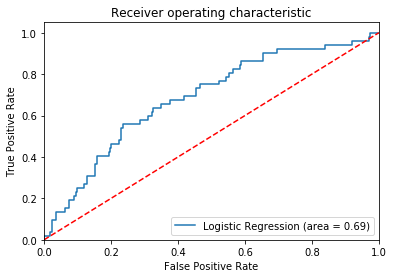

In [126]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

lr_prob = lr.predict_proba(test_x)[:,1]
lr_auc = roc_auc_score(test_y,lr_prob)
#rf_auc = roc_auc_score(test_y,)
fpr, tpr, thresholds = roc_curve(test_y, lr_prob)
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % lr_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [0]:
from google.colab import files
submission.to_csv('submission1.csv',index = False) 
files.download('submission1.csv')